In [2]:
import pandas as pd
from pandas import Series, DataFrame

In [7]:
# Set up the Titanic csv file as a DataFrame
titanic_df= pd.read_csv('train.csv')

In [8]:
#Preview the first 5 data points in Titanic data.
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# To get overall info for the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#First some basic questions:

#1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
#2.) What deck were the passengers on and how does that relate to their class?
#3.) Where did the passengers come from?
#4.) Who was alone and who was with family?

#Then we'll dig deeper, with a broader question:

#5.) What factors helped someone survive the sinking?


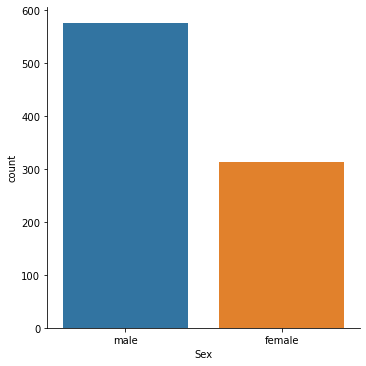

In [36]:
#So let's start with the first question: Who were the passengers on the titanic?

#Lets start with the gender
sns.catplot(x='Sex',data=titanic_df,kind='count')

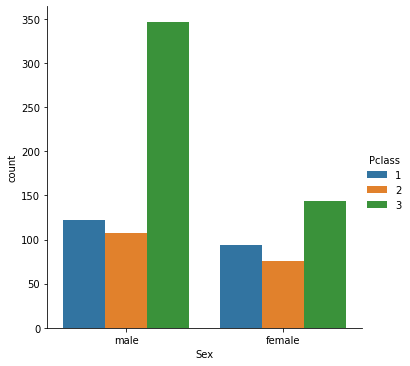

In [37]:
# Now let's seperate the genders by classes
sns.catplot(x='Sex',data=titanic_df,kind='count', hue='Pclass')

In [70]:
#Wow, quite a few more males in the 3rd class than females, an interesting find. However, it might be useful to know the split between males,females,and children. How can we go about this?

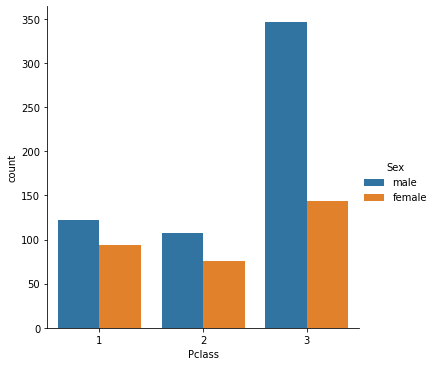

In [38]:
sns.catplot(x='Pclass',data=titanic_df,kind='count', hue='Sex')

In [9]:
def male_female_child(passenger):

    age,sex = passenger
   
    if age < 16:
        return 'child'
    else:
        return sex

In [10]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [11]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [117]:
#We can also use numpy to get the similar output. 
#For this we use 'where'

In [30]:
age= titanic_df.Age

sex= titanic_df.Sex

titanic_df['person']= np.where(age<16, 'child', sex)

In [31]:
#lets see the first 10 rows and check if we get the same output.

titanic_df[0:10]

#looks like we have the same output.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,persons
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,child


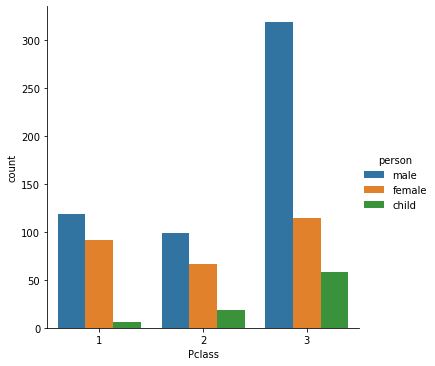

In [50]:
#Lets include 'child' variable in our visualization.
sns.catplot(x='Pclass',data=titanic_df, kind='count', hue='person')

In [71]:
#Interesting, quite a bit of children in 3rd class and not so many in 1st! How about we create a distribution of the ages to get a more precise picture of the who the passengers were.

<AxesSubplot:>

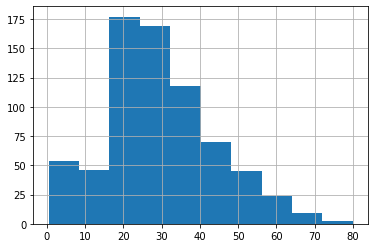

In [62]:
titanic_df['Age'].hist(bins=10)

#Age has a positively skewed distribution with mean age as 30.

In [52]:
titanic_df['Age'].mean()

29.69911764705882

<AxesSubplot:>

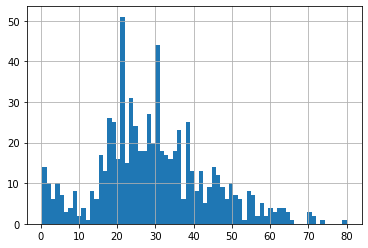

In [64]:
titanic_df['Age'].hist(bins=70)

In [65]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

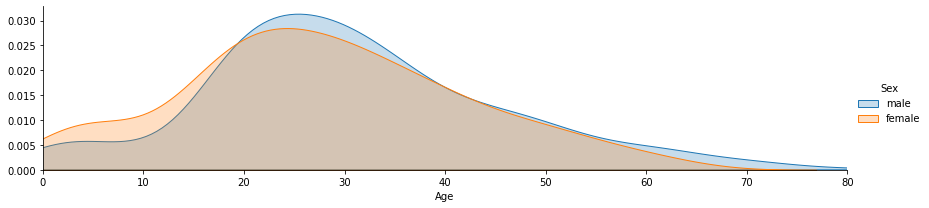

In [14]:
# now we will use facetgrid from seaborn to plot multiple kde plots.

fig= sns.FacetGrid(titanic_df, hue='Sex', aspect=4)

#we will use map to plot all the possible kdeplots for age

fig.map(sns.kdeplot,'Age', shade= True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

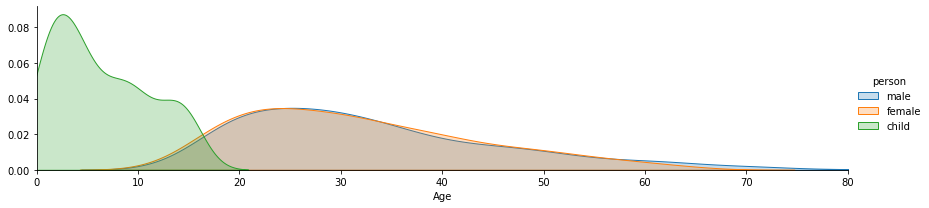

In [15]:
# We could have done the same thing for the 'person' column to include children:

fig = sns.FacetGrid(titanic_df, hue="person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

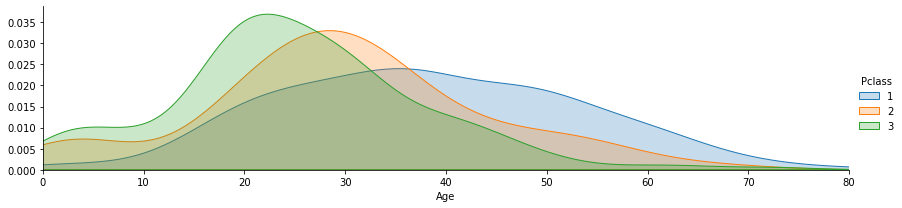

In [16]:
# Let's do the same for class by changing the hue argument:
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [17]:
#We've gotten a pretty good picture of who the passengers were based on Sex, Age, and Class. 
#So let's move on to our 2nd question: What deck were the passengers on and how does that relate to their class?

In [18]:
#Lets look at the dataset again

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,persons
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,male


In [19]:
#lets drop Nan values in Cabin column.

deck= titanic_df['Cabin'].dropna()

In [20]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [21]:
#Notice we only need the first letter of the deck to classify its level (e.g. A,B,C,D,E,F,G)

# So let's grab that letter for the deck level with a simple for loop

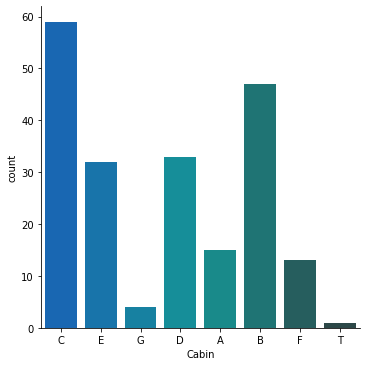

In [23]:
# Set empty list
levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])    #Level[0] is grabbing first string in Deck column and adding it to thee empty list 'Levels'

# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']  #naming the column.
sns.catplot(x='Cabin',data=cabin_df,palette='winter_d', kind='count')

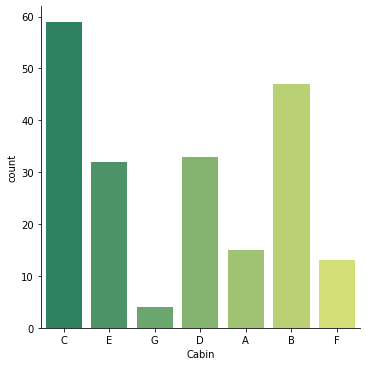

In [25]:
#looks like we have the a wrong data entry 'T' in our data. so we will get rid of it.

# Redefine cabin_df as everything but where the row was equal to 'T'
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#Replot
sns.catplot(x='Cabin',data=cabin_df,palette='summer', kind='count')

In [26]:
#lets take another look at our data.

titanic_df.head()

#Notice we have 2 person column just to show you the two methods which we did in the above coding.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,persons
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,male


In [32]:
# lets drop that one column.

titanic_df= titanic_df.drop('person', axis=1)

In [33]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,persons
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


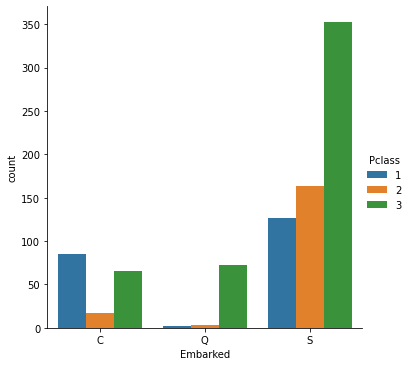

In [41]:
#Great now that we've analyzed the distribution by decks, let's go ahead and answer our third question:

#3.) Where did the passengers come from?

#Note here that the Embarked column has C,Q,and S values. 
#Reading about the project on Kaggle you'll note that 
#these stand for Cherbourg, Queenstown, Southhampton.


#lets make a factorplot

sns.catplot(x='Embarked',data=titanic_df,hue='Pclass', kind='count',order=['C','Q','S'])

In [42]:
#An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class. 
#It would be intersting to look at the economics of that town in that time period for further investigation.

#Now let's take a look at the 4th question:

#4.) Who was alone and who was with family?




In [43]:
# Let's start by adding a new column to define alone

# We'll add the parent/child column with the sibsp column
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [44]:
#lets make Alone column with string instead of 1's and 0's
alone= titanic_df['Alone']
titanic_df['Alone']= np.where(alone>0,'with family','Alone')

In [45]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,persons,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


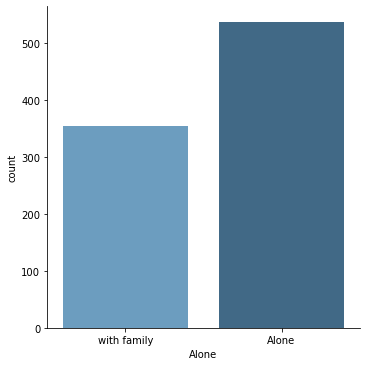

In [46]:
# Now let's get a simple visualization!
sns.catplot(x='Alone',data=titanic_df,palette='Blues_d', kind='count')

In [47]:
#Now that we've throughly analyzed the data let's go ahead and take a look at the most interesting (and open-ended) question
#: What factors helped someone survive the sinking?


In [48]:
# Let's start by creating a new column for legibility purposes through mapping
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})

titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,persons,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,Alone,no
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Alone,yes
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,with family,no
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,Alone,yes


In [49]:
#similarly we can also do this using where 

surv= titanic_df.Survived

titanic_df['Survivor']= np.where( surv==0,'No','Yes')

In [50]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,persons,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No


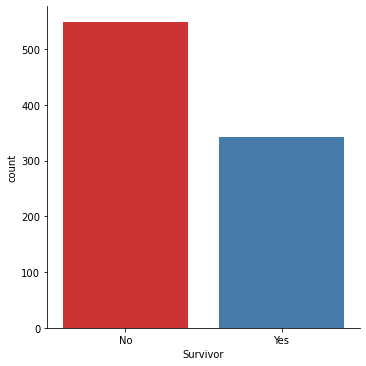

In [51]:
# Let's just get a quick overall view of survied vs died. 
sns.catplot(x='Survivor',data=titanic_df,palette='Set1', kind='count')

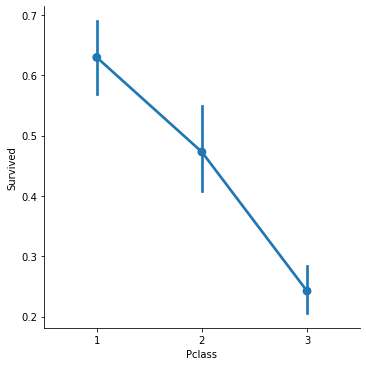

In [53]:
#Let's see if the class of the passengers had an effect on their survival rate, 
#since the movie Titanic popularized the notion that 
#the 3rd class passengers did not do as well as their 1st and 2nd class counterparts.


# Let's use a factor plot again, but now considering class
sns.catplot(x='Pclass',y='Survived',data=titanic_df, kind='point')

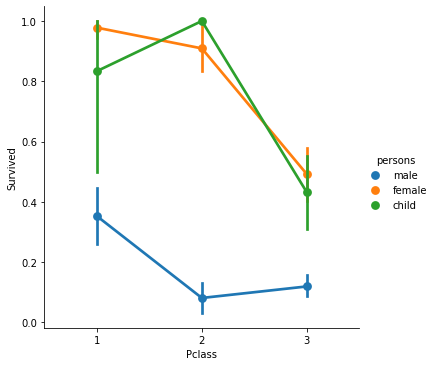

In [56]:
#Look like survival rates for the 3rd class are substantially lower! 
#But maybe this effect is being caused by the large amount of men in the 3rd class
#in combination with the women and children first policy. 
#Let's use 'hue' to get a clearer picture on this.


sns.catplot(x='Pclass',y='Survived',data=titanic_df, kind='point', hue='persons')

In [57]:
#From this data it looks like being a male or being in 3rd class
#were both not favourable for survival. 
#Even regardless of class the result of being a male in any class dramatically decreases your chances of survival.

#But what about age? Did being younger or older have an effect on survival rate?


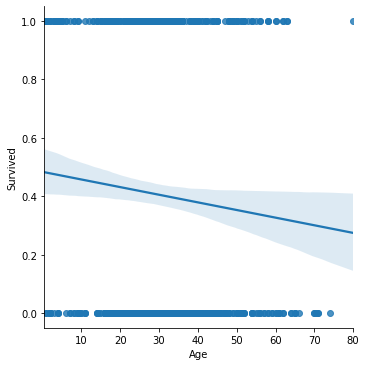

In [58]:
# Let's use a linear plot on age versus survival
sns.lmplot(x='Age',y='Survived',data=titanic_df)

In [59]:
#Looks like there is a general trend that the older the passenger was, the less likely they survived. Let's go ahead and use hue to take a look at the effect of class and age.

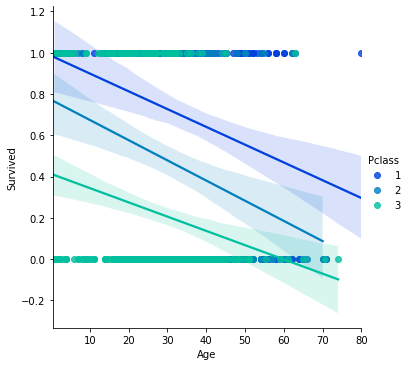

In [60]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df,palette='winter')

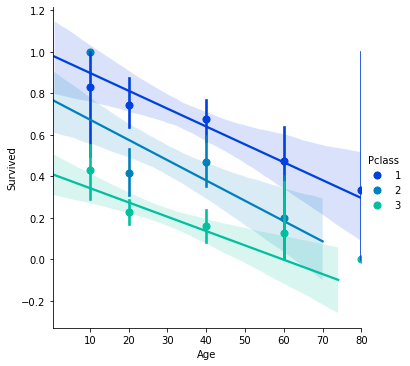

In [61]:
# Let's use a linear plot on age versus survival using hue for class seperation
generations=[10,20,40,60,80]
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

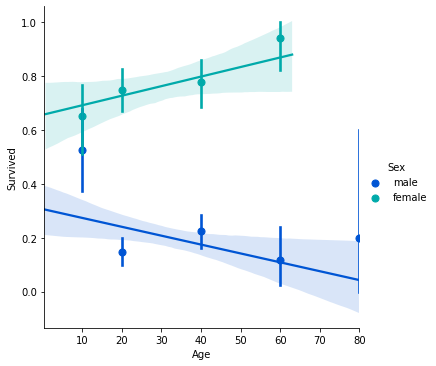

In [62]:
#What about if we relate gender and age with the survival set?
sns.lmplot(x='Age',y='Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)


In [64]:
#LEts check if the deck has something to do with survival and if Sex is also the factor in it.


deck

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

In [69]:
# Set empty list
levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])    #Level[0] is grabbing first string in Deck column and adding it to thee empty list 'Levels'

# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']  #naming the column.

In [70]:
cabin_df

,Cabin
0,C
1,C
2,E
3,G
4,C
...,...
199,D
200,B
201,C
202,B


In [93]:
titanic_df['cabin_level']=cabin_df

In [94]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,persons,Alone,Survivor,cabin_level
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S,male,with family,No,C
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,female,with family,Yes,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes,E
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,female,with family,Yes,G
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S,male,Alone,No,C


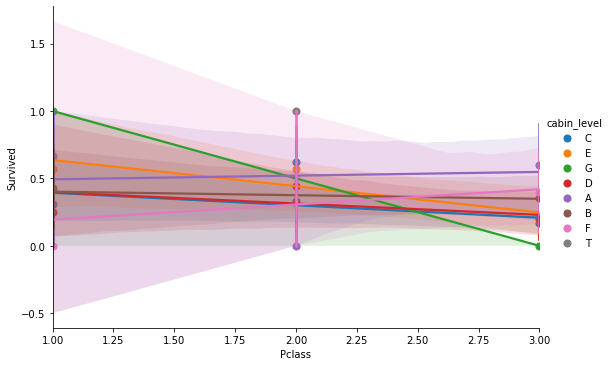

In [117]:
Class_level=[1,2,3]

sns.lmplot(x='Pclass',y='Survived',data=titanic_df,hue='cabin_level', x_bins=Class_level,aspect=1.5)


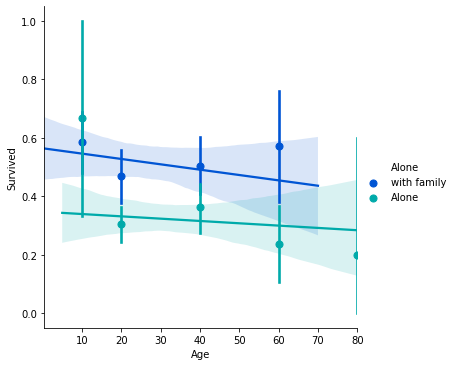

In [118]:
sns.lmplot(x='Age',y='Survived',hue='Alone',data=titanic_df,palette='winter',x_bins=generations)

In [119]:
#above plot shows that person with family has more chance of survival than 
#person being alone.

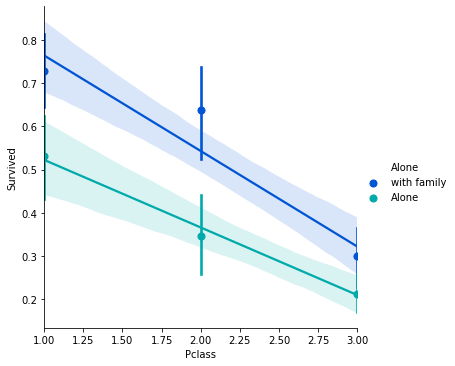

In [121]:
sns.lmplot(x='Pclass',y='Survived',hue='Alone',data=titanic_df,palette='winter',x_bins=Class_level)

In [ ]:
#Above plot has proves our claim of having a family will increase the odds
#of survival.